In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('equipment_tuning_dataset.csv')
df.head(); df.info(); df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   F1            1250 non-null   float64
 1   F2            1250 non-null   float64
 2   F3            1154 non-null   float64
 3   F4            1250 non-null   float64
 4   F5            1250 non-null   float64
 5   F6            1250 non-null   float64
 6   F7            1250 non-null   object 
 7   F8            1250 non-null   object 
 8   F9            1166 non-null   float64
 9   F10           1250 non-null   object 
 10  F11           1250 non-null   int64  
 11  F12           1250 non-null   float64
 12  Needs_Tuning  1250 non-null   object 
dtypes: float64(8), int64(1), object(4)
memory usage: 127.1+ KB


,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,Needs_Tuning
count,1250.000000,1250.000000,1154.000000,1250.000000,1250.000000,1250.000000,1250,1250,1166.000000,1250,1250.000000,1250.000000,1250
unique,NaN,NaN,NaN,NaN,NaN,NaN,10,3,NaN,4,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,S08,B,NaN,Z2,NaN,NaN,No
freq,NaN,NaN,NaN,NaN,NaN,NaN,135,433,NaN,351,NaN,NaN,699
mean,50.377088,40.008520,0.001929,29.939434,-0.007571,99.639747,NaN,NaN,0.496415,NaN,0.393600,4.932048,NaN
std,9.888929,29.779004,1.032088,7.931443,1.299155,15.641065,NaN,NaN,0.189756,NaN,0.488743,2.009101,NaN
min,17.587327,8.509809,-2.991136,2.810627,-8.982136,51.684755,NaN,NaN,0.000000,NaN,0.000000,-2.514871,NaN
25%,43.623482,25.130379,-0.712209,24.761290,-0.577992,88.936602,NaN,NaN,0.367878,NaN,0.000000,3.605815,NaN
50%,50.446917,33.708265,0.000185,29.827150,-0.032091,99.380286,NaN,NaN,0.496255,NaN,0.000000,4.967375,NaN
75%,56.612341,46.125163,0.678943,35.274016,0.524421,110.526491,NaN,NaN,0.625014,NaN,1.000000,6.339384,NaN


# 1. Exploratory Data Analysis (EDA)
Identify missing values and outliers, visualize distributions, and analyze class balance.

F1              0.0000
F2              0.0000
F3              0.0768
F4              0.0000
F5              0.0000
F6              0.0000
F7              0.0000
F8              0.0000
F9              0.0672
F10             0.0000
F11             0.0000
F12             0.0000
Needs_Tuning    0.0000
dtype: float64


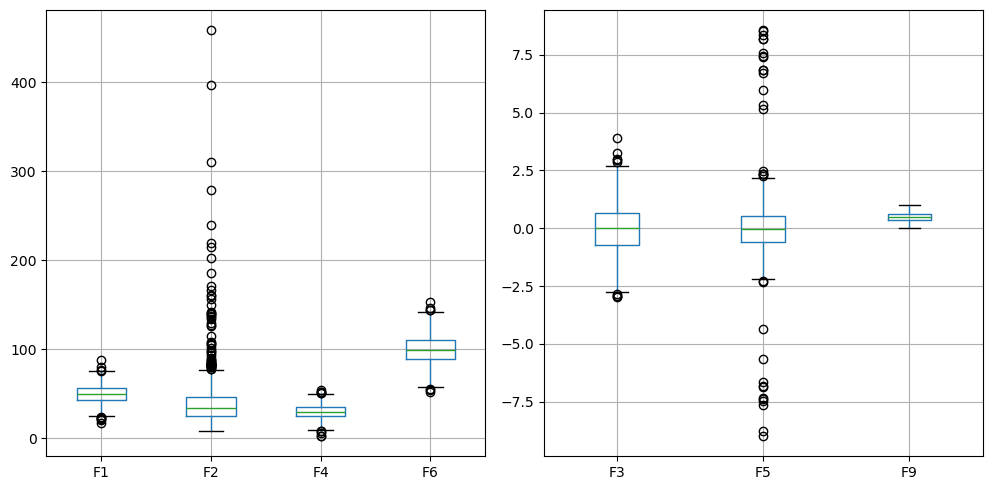

In [151]:
# Identify missing values and outliers
print(df.isna().mean()) # fraction missing per column

plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
df[[ 'F1', 'F2', 'F4', 'F6']].boxplot()

plt.subplot(1,3,2)
df[[ 'F3', 'F5', 'F9']].boxplot()

plt.tight_layout()
plt.show()

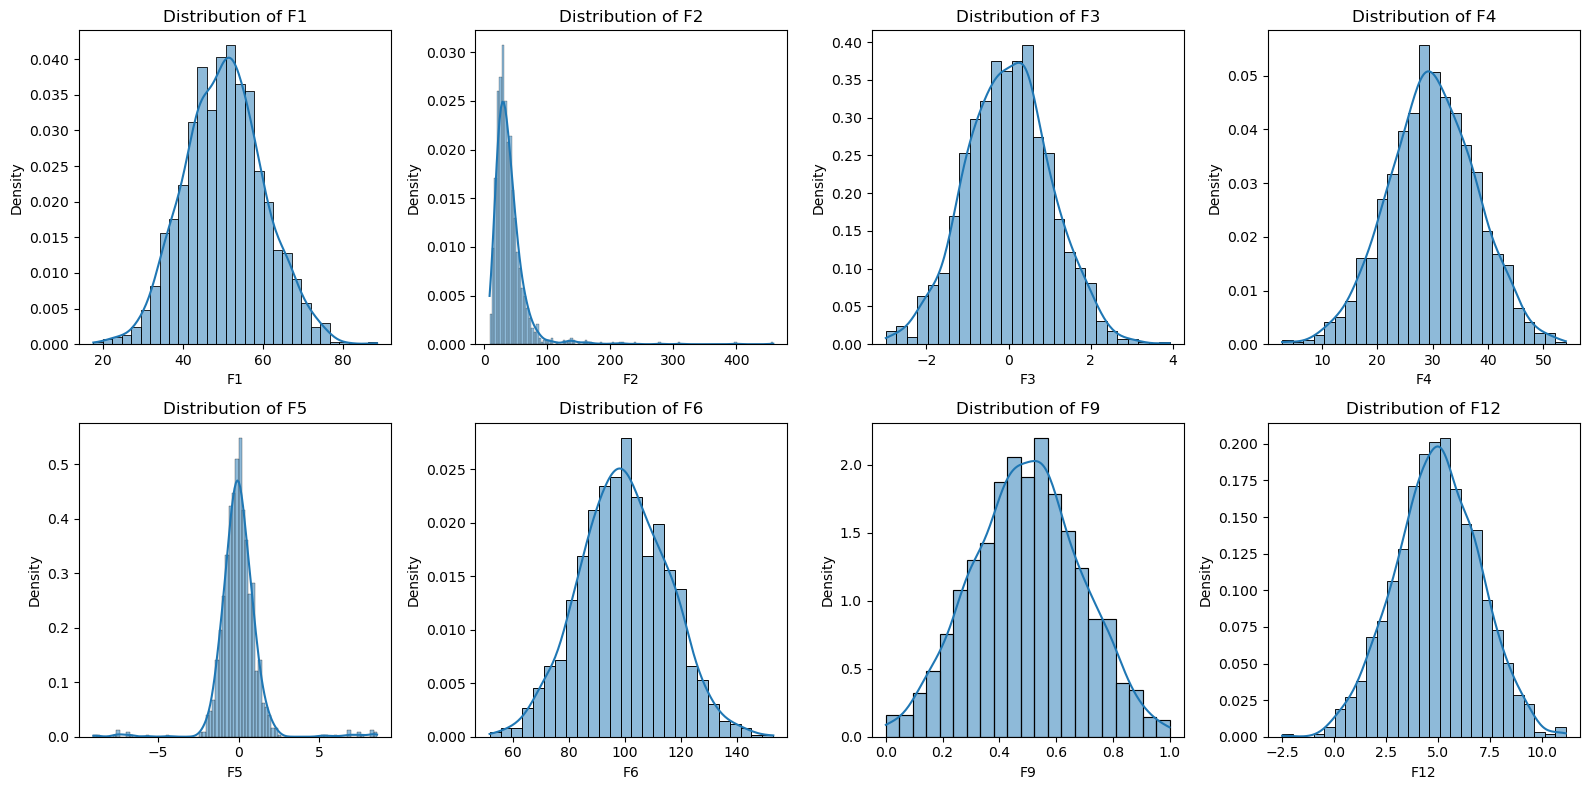

In [152]:
# Visualize distributions
df_numeric = df[["F1", "F2", "F3", "F4", "F5", "F6", "F9", "F12"]]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, feature in enumerate(df_numeric.columns):
    sns.histplot(df_numeric[feature], ax=axes[i], kde=True, stat="density")
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')

plt.tight_layout()
plt.show()


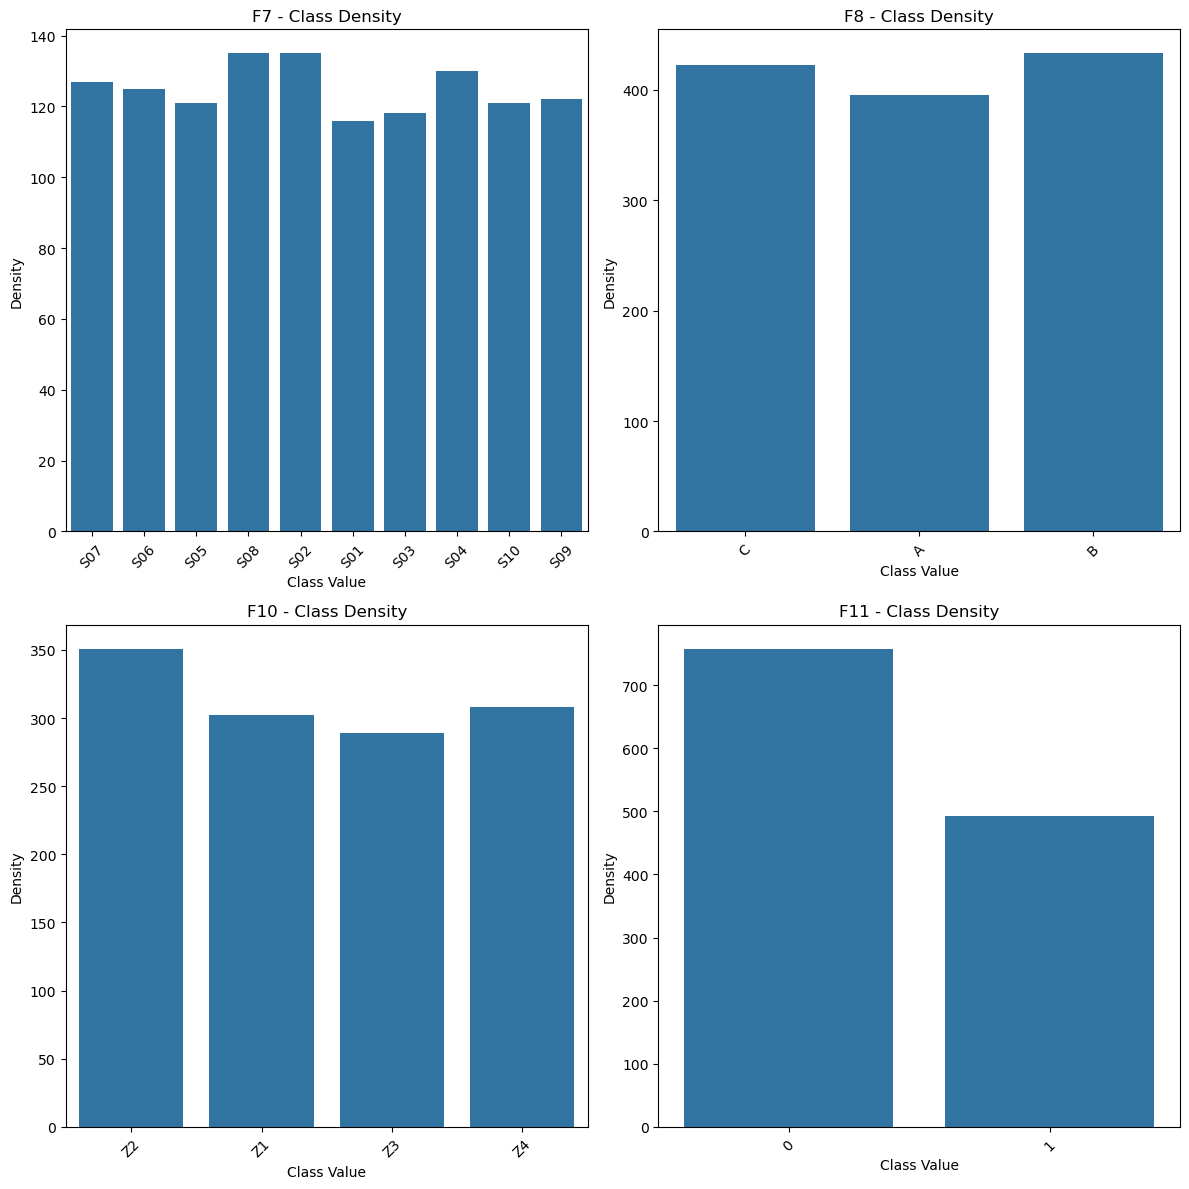

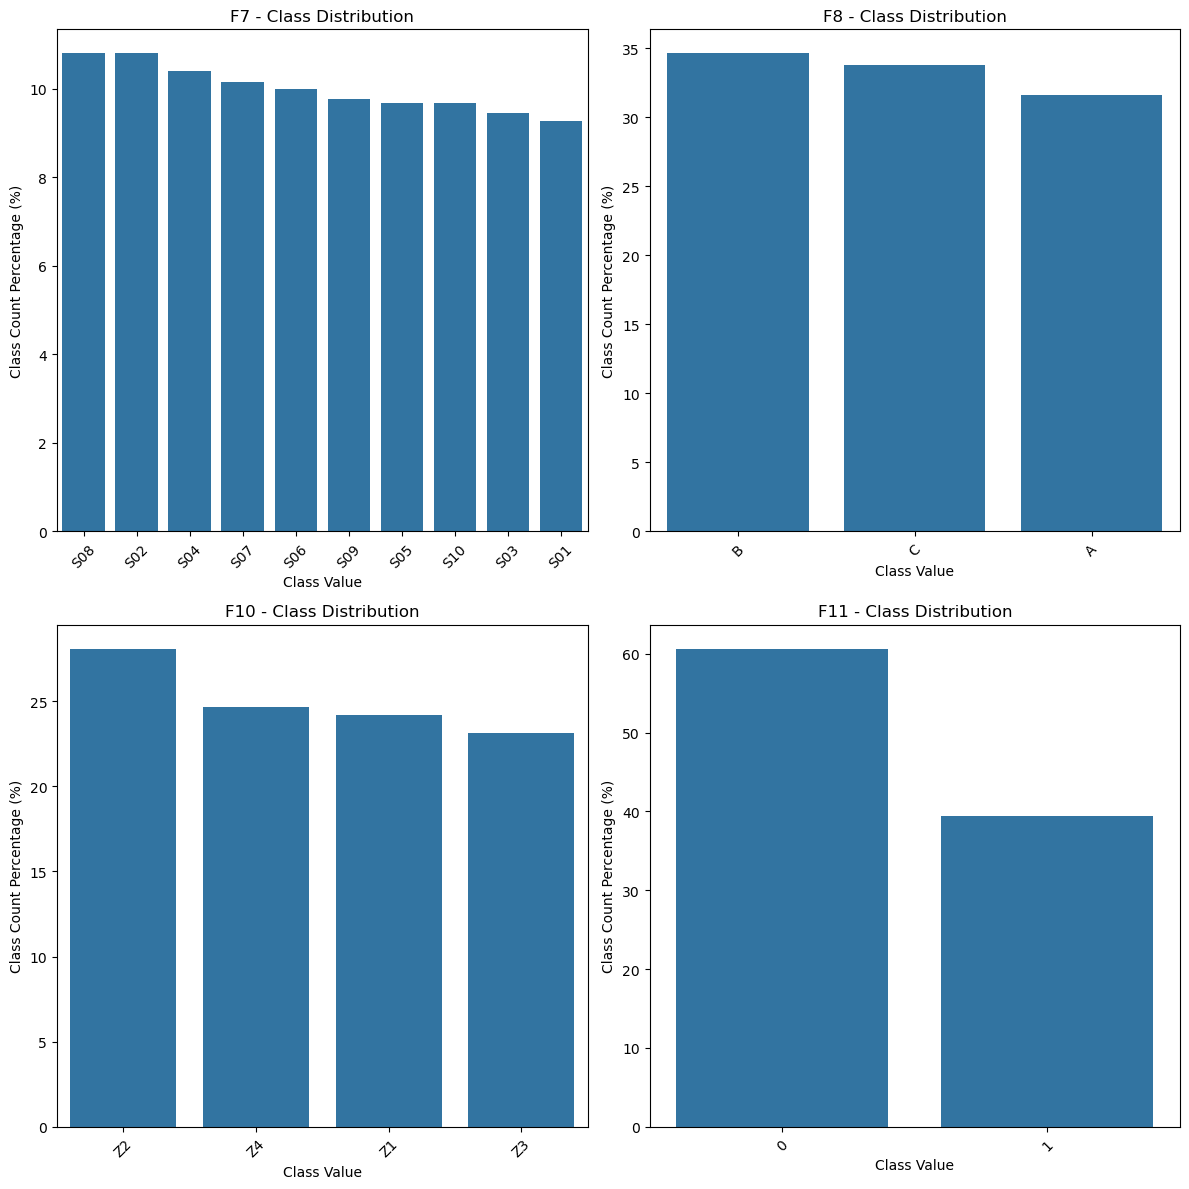

In [153]:
# analyze class balance
df_cat = df[["F7", "F8", "F10", "F11"]]

# Plot category density
fig_1, axes_1 = plt.subplots(2, 2, figsize=(12, 12))
axes_1 = axes_1.flatten()

for idx, feature in enumerate(df_cat.columns):
    # Plot category density
    sns.countplot(x=df_cat[feature], ax=axes_1[idx])
    axes_1[idx].set_title(f'{feature} - Class Density')
    axes_1[idx].set_xlabel('Class Value')
    axes_1[idx].set_ylabel('Density')
    axes_1[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Plot category distribution
fig_2, axes_2 = plt.subplots(2, 2, figsize=(12, 12))
axes_2 = axes_2.flatten()
for idx, feature in enumerate(df_cat.columns):
    class_count_percent = df_cat[feature].value_counts() / len(df_cat) * 100
    
    sns.barplot(x=class_count_percent.index, y=class_count_percent.values, ax=axes_2[idx])
    axes_2[idx].set_title(f'{feature} - Class Distribution')
    axes_2[idx].set_xlabel('Class Value')
    axes_2[idx].set_ylabel('Class Count Percentage (%)')
    axes_2[idx].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

# Plot Target Class balance
#FINISH ME WITH BAR GRAPH COMPARING TARGET FEATURE

# Data Preprocessing: Handle missing data, encode categorical variables, normalize or scale features, and justify preprocessing steps.

In [154]:
# Handle missing values
# Justification: F3 and F9 don't have a significant skew towards either directions and forms a bell-shaped curve indicating that the distirbution is normal and mean would be an acceptable imputation method
print(df.isna().mean())

df_filled = df
df_filled['F3'] = df['F3'].fillna(df['F3'].mean())
df_filled['F9'] = df['F9'].fillna(df['F9'].mean())

print(df_filled.isna().mean())

F1              0.0000
F2              0.0000
F3              0.0768
F4              0.0000
F5              0.0000
F6              0.0000
F7              0.0000
F8              0.0000
F9              0.0672
F10             0.0000
F11             0.0000
F12             0.0000
Needs_Tuning    0.0000
dtype: float64
F1              0.0
F2              0.0
F3              0.0
F4              0.0
F5              0.0
F6              0.0
F7              0.0
F8              0.0
F9              0.0
F10             0.0
F11             0.0
F12             0.0
Needs_Tuning    0.0
dtype: float64


In [157]:
# Encode categorical variables
# Justification: 

from sklearn.model_selection import train_test_split

X = df_filled.drop('Needs_Tuning', axis=1)
y = df_filled['Needs_Tuning']
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
random_state=42)

print(x.head(20))

SyntaxError: incomplete input (3311267501.py, line 12)

In [156]:
# Normalize or scale features